**Melchizedek Ackah-Blay**

December 2, 2024

*importing libraries*

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split as t

*loading dataset*

In [3]:
df = pd.read_csv(r'/Users/melki/Desktop/Employee.csv')

*displaying sample data*

In [5]:
df.sample(7)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
2698,Bachelors,2014,Bangalore,3,28,Male,No,3,0
3205,Masters,2015,Pune,2,33,Male,No,4,1
1722,Masters,2017,Pune,2,25,Male,No,3,0
2921,Bachelors,2013,Pune,2,28,Female,No,4,1
1126,Bachelors,2013,Bangalore,3,28,Male,No,0,0
3911,Bachelors,2012,Bangalore,3,36,Male,No,1,0
234,Masters,2015,Pune,2,25,Female,No,3,0


*looking at shape of the data*

In [7]:
df.shape

(4653, 9)

*looking at data types summary*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


*looking for null values*

In [9]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

*looking for duplicates*

In [10]:
df.duplicated().sum()

1889

*drop duplicated rows*

In [11]:
df.drop_duplicates(inplace = True)

*looking at the new shape*

In [12]:
df.shape

(2764, 9)

*looking at summary statistics*

In [13]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## EXPLORATORY ANALYSIS

a*nalyzing mean age of people with degrees*

In [15]:
df.groupby('Education')['Age'].mean().sort_values(ascending = False)

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

*analyzing employees who have been at the company the longest*

In [17]:
df.sort_values(by = 'JoiningYear', ascending = True).head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
3052,Bachelors,2012,Bangalore,3,34,Male,No,1,0
3054,Bachelors,2012,Bangalore,3,39,Female,No,2,0
3055,Bachelors,2012,Bangalore,3,41,Male,No,3,0
3058,Bachelors,2012,Bangalore,3,33,Male,No,2,0
415,Bachelors,2012,Pune,3,27,Female,No,5,0
3079,Bachelors,2012,Bangalore,3,37,Female,No,5,1
3084,Bachelors,2012,Pune,3,31,Male,No,5,0
3089,Bachelors,2012,Pune,3,34,Male,No,2,0
3090,Bachelors,2012,Bangalore,3,35,Female,No,1,0


*analyzing **education level** of employees*

In [19]:
education_levels = df['Education'].value_counts(normalize = True)
education_levels

Education
Bachelors    0.713097
Masters      0.230463
PHD          0.056440
Name: proportion, dtype: float64

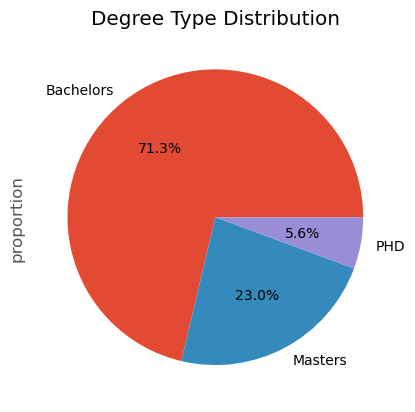

In [124]:
education_levels.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Degree Type Distribution')
plt.show()

*analyzing age distrbution*

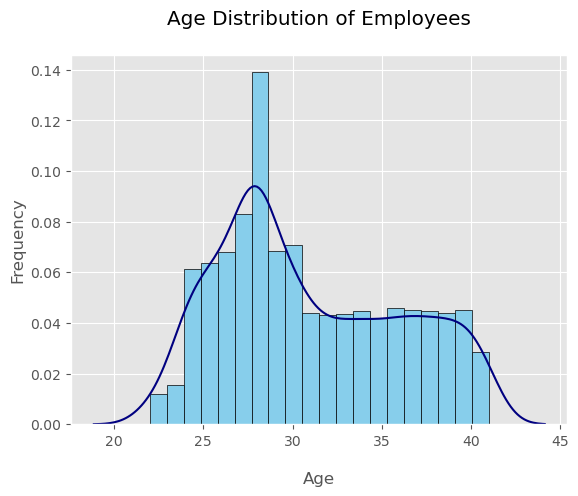

In [42]:
plt.hist(df['Age'], bins = 20, edgecolor = 'black', color = 'skyblue', density = True)
sns.kdeplot(df['Age'], color='navy', linewidth=1.5)
plt.title('Age Distribution of Employees\n')
plt.xlabel('\nAge')
plt.ylabel('Frequency')
plt.show()

*boxplot analyzing experience levels*

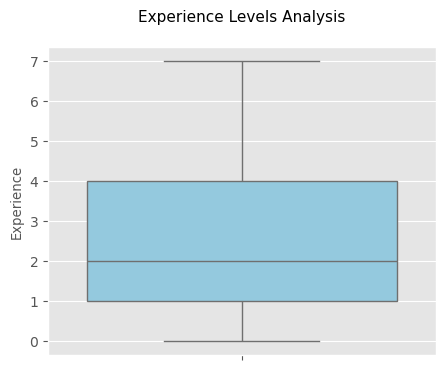

In [122]:
plt.figure(figsize = (5, 4))
sns.boxplot( df['ExperienceInCurrentDomain'], showfliers = False, color = 'skyblue')
plt.title('Experience Levels Analysis\n', fontsize = 11)
plt.ylabel('Experience', fontsize = 9.5)
plt.show()

*comparing age and experience*

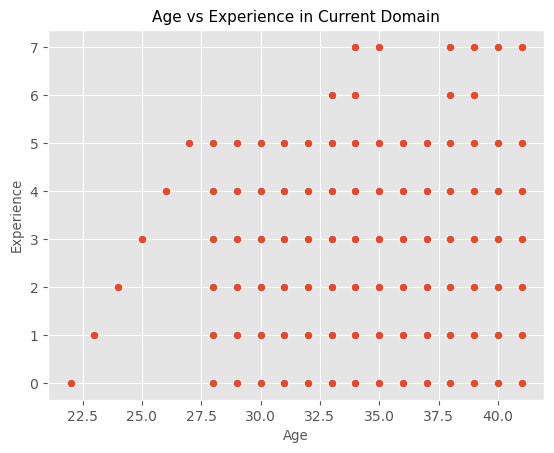

In [58]:
sns.scatterplot(x = df['Age'], y = df['ExperienceInCurrentDomain'])
plt.title('Age vs Experience in Current Domain', fontsize = 11)
plt.ylabel('Experience', fontsize = 9.5)
plt.xlabel('Age', fontsize = 9.5)
plt.show()

*analyzing employees who left based on city*

In [60]:
df.groupby('City')['LeaveOrNot'].value_counts().sort_values(ascending = False)

City       LeaveOrNot
Bangalore  0             761
New Delhi  0             522
Bangalore  1             410
Pune       1             408
           0             393
New Delhi  1             270
Name: count, dtype: int64

*analyzing age based on Education and Gender*

In [61]:
df.groupby(['Education', 'Gender'])['Age'].mean().sort_values(ascending = False)

Education  Gender
Bachelors  Male      31.619313
           Female    30.929530
Masters    Female    30.348921
           Male      29.994429
PHD        Male      29.795699
           Female    29.730159
Name: Age, dtype: float64

*analyzing experience based on gender*

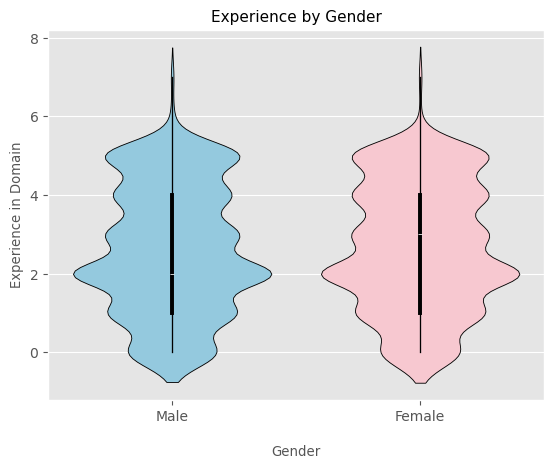

In [120]:
cols = ['skyblue', 'pink']
sns.violinplot(x = 'Gender', y = 'ExperienceInCurrentDomain', data = df, palette = cols, hue = 'Gender', edgecolor = 'black')
plt.title('Experience by Gender', fontsize = 11)
plt.xlabel('\nGender', fontsize = 9.5)
plt.ylabel('Experience in Domain', fontsize = 9.5)
plt.show()

*analyzing employees who left or stayed based on gender*

In [75]:
gender_ana = df.groupby('Gender')['LeaveOrNot'].value_counts().unstack()
gender_ana

LeaveOrNot,0,1
Gender,,
Female,621,614
Male,1055,474


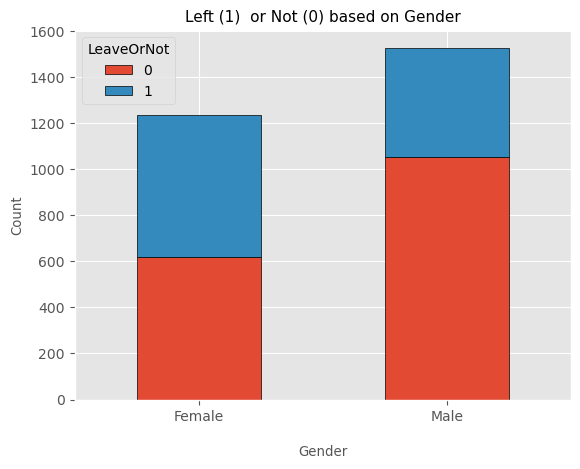

In [119]:
gender_ana.plot(kind = 'bar', stacked = True, edgecolor = 'black')
plt.title('Left (1)  or Not (0) based on Gender', fontsize = 11)
plt.xlabel('\nGender', fontsize = 9.5)
plt.ylabel('Count', fontsize = 9.5)
plt.xticks(rotation = 0)
plt.show()

*joining year distribution*

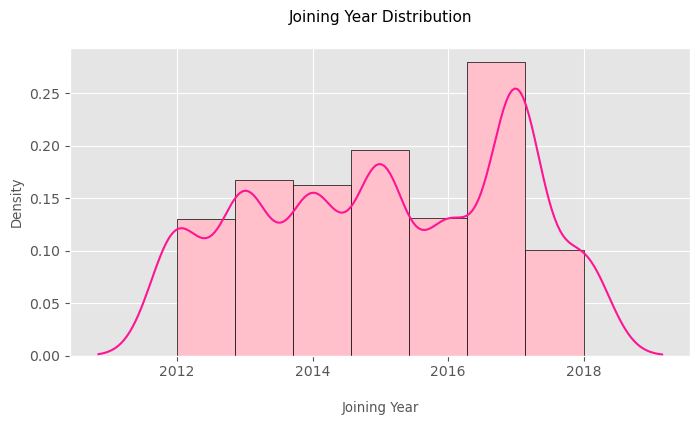

In [104]:
plt.figure(figsize = (8, 4))
plt.hist(df['JoiningYear'], color = 'pink', edgecolor = 'black', density = True, bins = 7)
sns.kdeplot(df['JoiningYear'], color = 'deeppink', linewidth = 1.5)
plt.title('Joining Year Distribution\n', fontsize = 11)
plt.xlabel('\nJoining Year', fontsize = 9.5)
plt.ylabel('Density', fontsize  = 9.5)
plt.show()

*experience in domain by gender*

In [105]:
gender_edu_exp = df.groupby(['Gender', 'Education'])['ExperienceInCurrentDomain'].mean().unstack()
gender_edu_exp

Education,Bachelors,Masters,PHD
Gender,,,
Female,2.647651,2.741007,2.84127
Male,2.564531,2.715877,2.83871


*visualizing experience by education and gender using bar graphs*

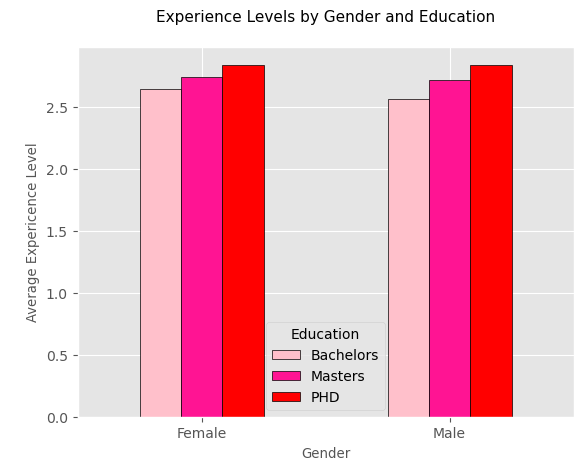

In [118]:
gender_edu_exp.plot(kind = 'bar', color = ['pink', 'deeppink', 'red'], edgecolor = 'black')
plt.xticks(rotation = 0)
plt.title('Experience Levels by Gender and Education\n', fontsize = 11)
plt.xlabel('Gender', fontsize = 9.5)
plt.ylabel('\nAverage Expericence Level', fontsize = 9.5)
plt.show()

*visualizing experience by education and gender using box plots*

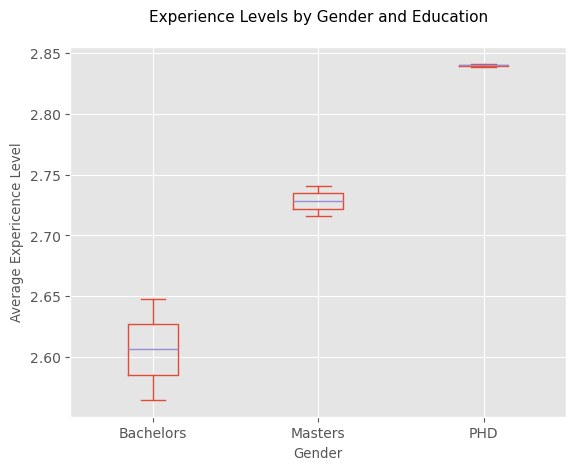

In [138]:
gender_edu_exp.plot(kind = 'box', showfliers = False)
plt.xticks(rotation = 0)
plt.title('Experience Levels by Gender and Education\n', fontsize = 11)
plt.xlabel('Gender', fontsize = 9.5)
plt.ylabel('Average Expericence Level', fontsize = 9.5)
plt.show()

*analyzing age based on joining year and city*

In [142]:
city_year_age = df.groupby(['JoiningYear', 'City'])['Age'].mean().unstack()
city_year_age

City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,31.993631,29.657895,30.333333
2013,30.965714,29.627273,30.369369
2014,31.562162,29.662921,31.171171
2015,31.488372,29.750000,31.020833
2016,31.931250,29.916667,30.743590
2017,31.583732,31.032374,30.680000
2018,31.389381,30.388060,30.949153


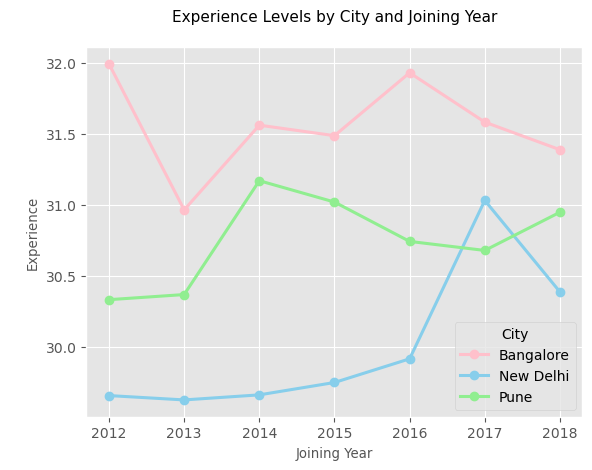

In [157]:
city_year_age.plot(kind = 'line', marker = 'o', linewidth = 2.2, color = ['pink', 'skyblue', 'lightgreen'])
plt.title('Experience Levels by City and Joining Year\n', fontsize = 11)
plt.xlabel('Joining Year', fontsize = 9.5)
plt.ylabel('\nExperience', fontsize = 9.5)
plt.show()

## FEATURE ENGINEERING

In [158]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [165]:
x = df.drop(columns = ['LeaveOrNot'])
y = df['LeaveOrNot']

In [166]:
x = x.drop(columns = ['JoiningYear', 'City', 'Age'])
x.sample(4)

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
4009,Bachelors,1,Female,Yes,1
1949,Masters,2,Female,No,5
1493,Masters,3,Female,No,5
390,Bachelors,3,Male,No,2


label encoding the categorical x values

In [167]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [168]:
x['Education'] = encoder.fit_transform(x['Education'])
x['Gender'] = encoder.fit_transform(x['Gender'])
x['EverBenched'] = encoder.fit_transform(x['EverBenched'])

In [169]:
x.sample(4)

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
3856,0,2,1,0,2
401,0,3,0,0,2
3781,0,3,1,1,3
3364,0,2,1,0,2


splitting data into train and test

In [172]:
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 1)

scaling data

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [182]:
items = [x_train, x_test, y_train, y_test]
names = ['x_train:', 'x_test:', 'y_train:', 'y_test:']
j = 0
for i, j in zip(items, names):
    print(j)
    print(len(i))
    print('\n')

x_train:
2211


x_test:
553


y_train:
2211


y_test:
553




In [184]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [240]:
from sklearn.metrics import accuracy_score
def evaluator(pred):
    print(f'\nthe accuracy is {round(accuracy_score(y_test, pred),9)}\n')

training logistic regression model

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)
log_pred = log_model.predict(x_test_scaled)

evaluating logistic regression model

In [191]:
evaluator(log_pred)


the accuracy is 0.584087



training kneighbor gridsearch model

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [219]:
knc_grid = {
    'n_neighbors':[3, 5, 8, 12],
    'weights' : ['uniform', 'distance', None]
}

random_forest_grid = {
    'n_estimators': [40, 50, 120, 200],
    'criterion' : ["gini", "entropy", "log_loss"]
}

adaboost_grid = {
    'n_estimators':[50, 100],
    'learning_rate':[0.5, 1.0, 1.5]
}

xg_grid = {
    'n_estimators':[50, 100, 75],
    'max_depth': [None, 5, 10, 30],
    'learning_rate': [0.04, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

**KNEIGHBORS MODEL**

In [198]:
gridKNC = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knc_grid, cv = 5)
gridKNC.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 8, 12],
                         'weights': ['uniform', 'distance', None]})

In [241]:
gridKNC_pred = gridKNC.predict(x_test_scaled)
#evaluating model
evaluator(gridKNC_pred)


the accuracy is 0.643761302



*analyzing model's best paramaters*

In [203]:
gridKNC.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

**RANDOM FOREST MODEL**

In [201]:
gridRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = random_forest_grid, cv = 5)
gridRFC.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [40, 50, 120, 200]})

In [202]:
gridRFC_pred = gridRFC.predict(x_test_scaled)
#evaluating model
evaluator(gridRFC_pred)


the accuracy is 0.640145



*analyzing model's best paramaters*

In [204]:
gridRFC.best_params_

{'criterion': 'entropy', 'n_estimators': 120}

**ADABOOST MODEL 1**

In [210]:
gridABC = GridSearchCV(estimator = AdaBoostClassifier(estimator = RandomForestClassifier()), param_grid = adaboost_grid, cv = 5)
gridABC.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100]})

In [211]:
gridABC_pred = gridABC.predict(x_test_scaled)
#evaluating model
evaluator(gridABC_pred)


the accuracy is 0.636528



*analyzing model's best paramaters*

In [216]:
gridABC.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

**ADABOOST MODEL 2**

In [213]:
from sklearn.tree import DecisionTreeClassifier
gridABC2 = GridSearchCV(estimator = AdaBoostClassifier(estimator = DecisionTreeClassifier()), param_grid = adaboost_grid, cv = 5)
gridABC2.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100]})

In [242]:
gridABC2_pred = gridABC2.predict(x_test_scaled)
#evaluating model
evaluator(gridABC2_pred)


the accuracy is 0.643761302



*analyzing model's best paramaters*

In [217]:
gridABC2.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

**XGBOOST MODEL**

In [222]:
gridXG = GridSearchCV(estimator = XGBClassifier(), param_grid = xg_grid, cv = 5)
gridXG.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.04, 0.1, 0.2],
                         'max_depth': [None, 5, 10, 30],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 75]})

In [223]:
gridXG_pred = gridXG.predict(x_test_scaled)
#evaluating model
evaluator(gridXG_pred)


the accuracy is 0.605787



*analyzing model's best paramaters*

In [239]:
gridXG.best_params_

{'learning_rate': 0.04,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 75}

**SUPPORT VECTOR MODEL**

In [235]:
sv_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1], 
}

In [230]:
from sklearn.svm import SVC

In [236]:
gridSVC = GridSearchCV(SVC(), param_grid = sv_grid)
gridSVC.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [237]:
gridSVC_pred = gridSVC.predict(x_test_scaled)
#evaluating model
evaluator(gridSVC_pred)


the accuracy is 0.636528



*analyzing model's best paramaters*

In [238]:
gridSVC.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

**FINAL EVALUATIONS**

*AdaBoost and KNeighbor Classifier models performed the best.*

*As a result, I will compare them using other metrics: precision_score, recall_score, and F1 score*

In [243]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [249]:
def evaluator2(pred):
    print(f'precision score: {round(precision_score(y_test, pred), 3)}')
    print(f'recall score: {round(recall_score(y_test, pred),3)}')
    print(f'f1 score: {round(f1_score(y_test, pred),3)}')

re-evaluating kneighbor classifier model

In [250]:
evaluator2(gridKNC_pred)

precision score: 0.658
recall score: 0.395
f1 score: 0.494


re-evaluating adaboost classifier model

In [251]:
evaluator2(gridABC2_pred)

precision score: 0.677
recall score: 0.362
f1 score: 0.472


**FINAL MODEL EVALUATIONS**

*the gridsearchCV kneighbor classifier model performed **better** at the end*

In [255]:
best_model = gridKNC.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [257]:
from sklearn.inspection import permutation_importance

In [260]:
result = permutation_importance(best_model, x_train, y_train, n_repeats = 10, random_state = 1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fi

*dataFrame to display the feature importances*

In [261]:
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
0                  Education    0.021348
4  ExperienceInCurrentDomain    0.005427
1                PaymentTier    0.000724
3                EverBenched   -0.006242
2                     Gender   -0.018318


**CONCLUSION**


the factors that impacted if employees would leave their job were

**1.** Education Level

**2.** Experience Level in their current domain

**3.** Payment Tier

**4.** If they were ever benched

**5.** Gender 



**RECOMMENDATIONS**

at the very least, the company should ensure it's most **educated** employees with the **highest level of experience** maintain a positive relationship with the company, so as to not lose their talents to competitors